<img src="https://github.com/FarzadNekouee/Hotel_Booking_Cancellation_Prediction/blob/master/image.jpg?raw=true" width="1800">
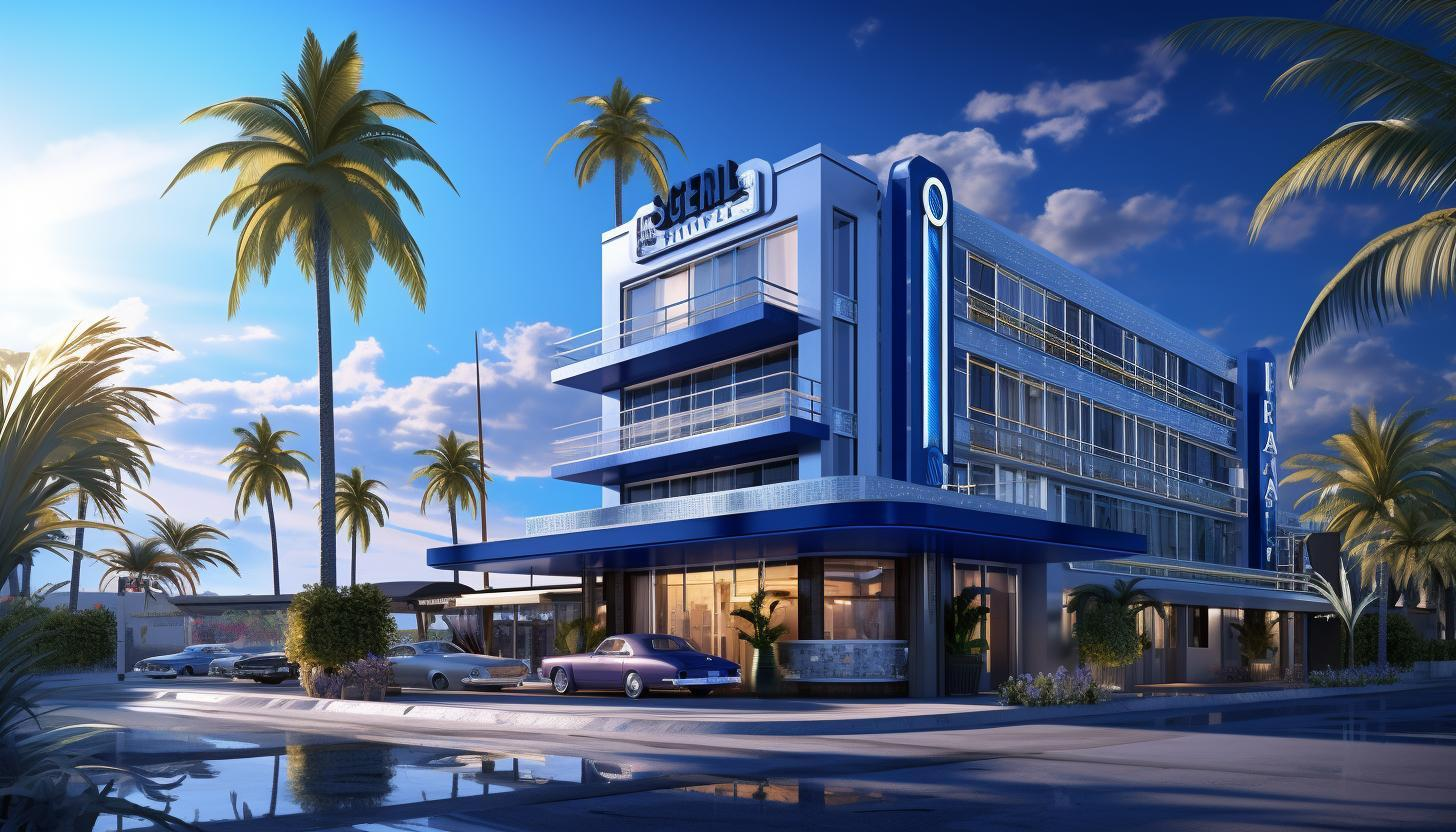

<h2 align="left"><font color=royalblue>Let's get started:</font></h2>

<a id="import"></a>
# <p style="background-color:royalblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [10]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


In [11]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': 'lavender'}, style='darkgrid')

<a id="read"></a>
# <p style="background-color:royalblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #d1d1ed; font-size:115%; text-align:left">

Let's begin by loading the dataset:

In [12]:
# Read dataset
df = pd.read_csv('/kaggle/input/hotel-bookingcvs/hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


<div style="border-radius:10px; padding: 15px; background-color: #d1d1ed; font-size:120%; text-align:left">

<h2 align="left"><font color=royalblue>Dataset Description:</font></h2>

| __Index__ | __Variable__ | __Description__ |
|   :---    |     :---     |       :---      |
| 1 | __hotel__ | Type of hotel (Resort Hotel, City Hotel) |
| 2 | __is_canceled__ | Reservation cancellation status (0 = not canceled, 1 = canceled) |
| 3 | __lead_time__ | Number of days between booking and arrival |
| 4 | __arrival_date_year__ | Year of arrival |
| 5 | __arrival_date_month__ | Month of arrival |
| 6 | __arrival_date_week_number__ | Week number of the year for arrival |
| 7 | __arrival_date_day_of_month__ | Day of the month of arrival |
| 8 | __stays_in_weekend_nights__ | Number of weekend nights (Saturday and Sunday) the guest stayed or booked |
| 9 | __stays_in_week_nights__ | Number of week nights the guest stayed or booked |
| 10 | __adults__ | Number of adults |
| 11 | __children__ | Number of children |
| 12 | __babies__ | Number of babies |
| 13 | __meal__ | Type of meal booked (BB, FB, HB, SC, Undefined) |
| 14 | __country__ | Country of origin of the guest |
| 15 | __market_segment__ | Market segment designation |
| 16 | __distribution_channel__ | Booking distribution channel |
| 17 | __is_repeated_guest__ | If the guest is a repeat customer (0 = not repeated, 1 = repeated) |
| 18 | __previous_cancellations__ | Number of previous bookings that were canceled by the customer |
| 19 | __previous_bookings_not_canceled__ | Number of previous bookings that were not canceled by the customer |
| 20 | __reserved_room_type__ | Type of reserved room |
| 21 | __assigned_room_type__ | Type of assigned room |
| 22 | __booking_changes__ | Number of changes made to the booking |
| 23 | __deposit_type__ | Type of deposit made (No Deposit, Refundable, Non Refund) |
| 24 | __agent__ | ID of the travel agent responsible for the booking |
| 25 | __company__ | ID of the company responsible for the booking |
| 26 | __days_in_waiting_list__ | Number of days the booking was in the waiting list |
| 27 | __customer_type__ | Type of customer (Transient, Contract, Transient-Party, Group) |
| 28 | __adr__ | Average Daily Rate |
| 29 | __required_car_parking_spaces__ | Number of car parking spaces required |
| 30 | __total_of_special_requests__ | Number of special requests made |
| 31 | __reservation_status__ | Last reservation status (Check-Out, Canceled, No-Show) |
| 32 | __reservation_status_date__ | Date of the last reservation status |
| 33 | __name__ | Guest's name |
| 34 | __email__ | Guest's email address |
| 35 | __phone-number__ | Guest's phone number |
| 36 | __credit_card__ | Last four digits of the guest's credit card |


<a id="overview"></a>
# <p style="background-color:royalblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #d1d1ed; font-size:115%; text-align:left">

Next, I'll embark on an in-depth examination of the dataset:

<a id="basic"></a>
# <b><span style='color:darkturquoise'>Step 3.1 |</span><span style='color:royalblue'> Dataset Basic Information</span></b>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<div style="border-radius:10px; padding: 15px; background-color: #d1d1ed; font-size:115%; text-align:left">

<h2 align="left"><font color=royalblue>Inferences:</font></h2>

* __Number of Entries__: The dataset consists of __119,390 entries__.

* __Columns__: The dataset contains __36 columns__, which represent various attributes related to hotel bookings.

* __Data Types__:
    - A majority of the columns, 16 to be precise, are of the __object__ data type (often representing strings or categorical data).
    - 16 columns are of the __int64__ data type, representing integer values.
    - 4 columns are of the __float64__ data type, which typically denotes decimal values.

* __Missing Values__: 
    - The column `children` has 4 missing values.
    - The column `country` has 488 missing values.
    - The column `agent` has 16,340 missing values.
    - The column `company` has a significant number of missing values, totaling 112,593.

These missing values might need addressing, depending on the context of the analysis or the model we intend to build.

<div style="border-radius:10px; padding: 15px; background-color: #d1d1ed; font-size:115%; text-align:left">

<h2 align="left"><font color=royalblue>Note:</font></h2>
    
Based on the data types and the feature explanations provided earlier, we identified that __20 columns__ (`hotel`, `is_canceled`, `arrival_date_year`, `arrival_date_month`, `meal`, `country`, `market_segment`, `distribution_channel`, `is_repeated_guest`, `reserved_room_type`, `assigned_room_type`, `deposit_type`, `agent`, `company`, `customer_type`, `reservation_status`, `name`, `email`, `phone-number` and `credit_card`) are __categorical__ in terms of their semantics. These features must have string (__object__) data type to ensure proper analysis and interpretation in subsequent steps:

In [14]:
# Based on the given dataset description, list the columns that are categorical in terms of their semantics
categorical_columns_semantics = [
    'hotel',
    'is_canceled',
    'arrival_date_year',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'is_repeated_guest',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'agent',
    'company',
    'customer_type',
    'reservation_status',
    'name',
    'email',
    'phone-number',
    'credit_card'
]

# Convert these columns to string (object) data type
for column in categorical_columns_semantics:
    if column in df.columns:
        df[column] = df[column].astype(str)

# Verify the changes in data types
df.dtypes

hotel                              object
is_canceled                        object
lead_time                           int64
arrival_date_year                  object
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

<a id="numerical"></a>
# <b><span style='color:darkturquoise'>Step 3.2 |</span><span style='color:royalblue'> Summary Statistics for Numerical Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #d1d1ed; font-size:115%; text-align:left">
    
Let's explore the summary statistics of our numeric variables:

In [15]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0
previous_cancellations,119390.0,0.087118,0.844336,0.00,0.00,0.000,0.0,26.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.00,0.00,0.000,0.0,72.0


<div style="border-radius:10px; padding: 15px; background-color: #d1d1ed; font-size:115%; text-align:left">

<h2 align="left"><font color=royalblue>Numerical Variables:</font></h2>

* __`lead_time`__: The average time between booking and arrival is approximately 104 days, ranging from 0 to 737 days.
    

* __`arrival_date_week_number`__: The average week number of the year for arrival is approximately 27.17, ranging from 1 to 53.

    
* __`arrival_date_day_of_month`__: The average day of the month of arrival is approximately 15.80, ranging from 1 to 31.
    
    
* __`stays_in_weekend_nights`__: On average, guests stay for around 0.93 weekend nights, with some guests staying for as long as 19 weekend nights.
    
    
* __`stays_in_week_nights`__: On average, guests stay for about 2.5 week nights, with stays ranging from 0 to 50 week nights.
    
    
* __`adults`__: The average number of adults per booking is approximately 1.86, with a range from 0 to 55 adults.
    
    
* __`children`__: On average, there are about 0.1 children per booking, with a maximum of 10 children in some bookings.
    
    
* __`babies`__: The average number of babies per booking is very low, approximately 0.008, with a maximum of 10 babies in some bookings.
    
    
* __`previous_cancellations`__: On average, guests have canceled about 0.09 times in the past, with some guests having as many as 26 previous cancellations.
    
    
* __`previous_bookings_not_canceled`__: On average, guests have not canceled about 0.14 bookings in the past, with some guests having as many as 72 previous bookings that they didn't cancel.
    
    
* __`booking_changes`__: Bookings are changed on average about 0.22 times, with some bookings being changed up to 21 times.
    
    
* __`days_in_waiting_list`__: The average time a booking spends on the waiting list is approximately 2.32 days, with some bookings waiting for as long as 391 days.
    
    
* __`adr`__: The Average Daily Rate is about 101.83, with rates ranging from -6.38 (which might indicate errors or special cases) to 5400.
    
    
* __`required_car_parking_spaces`__: On average, guests require about 0.06 parking spaces, with some bookings requiring up to 8 spaces.
    
    
* __`total_of_special_requests`__: On average, guests make about 0.57 special requests, with some making up to 5 requests.

<div style="border-radius:10px; padding: 15px; background-color: #d1d1ed; font-size:115%; text-align:left">

<h2 align="left"><font color=royalblue>Noisy Data Features:</font></h2>

Based on the descriptions and the inferences provided earlier, the following features seem to contain noisy data:

1. __`adr`__: The Average Daily Rate (ADR) represents the average amount a guest pays for a room per day. In this dataset, ADR has a minimum value of -6.38. A negative rate doesn't make sense, indicating potential errors or special cases.

    
2. __`adults`__: The minimum value is 0, which implies bookings without any adults. This could be a data entry error unless there are legitimate cases where only children or babies book a room.

    
3. __`children`__ and __`babies`__: Both have a maximum value of 10, which seems unusually high for a single booking. This could be a potential outlier or data entry error, but it would require more context or domain knowledge to say definitively.

Further investigation, possibly involving domain expertise or additional context, would be necessary to determine the true nature of these data points.

<a id="categorical"></a>
# <b><span style='color:darkturquoise'>Step 3.3 |</span><span style='color:royalblue'> Summary Statistics for Categorical Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #d1d1ed; font-size:115%; text-align:left">

Next, let's examine the summary statistics for our categorical variables:

In [16]:
# Get the summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
is_canceled,119390,2,0,75166
arrival_date_year,119390,3,2016,56707
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,119390,178,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
is_repeated_guest,119390,2,0,115580
reserved_room_type,119390,10,A,85994


<div style="border-radius:10px; padding: 15px; background-color: #d1d1ed; font-size:115%; text-align:left">
    
    
<h2 align="left"><font color=royalblue>Categorical Variables:</font></h2>

* __`hotel`__: There are two types of hotels, with "City Hotel" being the most frequent category, occurring 79,330 times out of 119,390 entries.

    
* __`is_canceled`__: Two unique values (0 for not canceled and 1 for canceled) are present. The most common value is "0" (not canceled), occurring 75,166 times.

    
* __`arrival_date_year`__: There are three unique years present, with 2016 being the most frequent year of arrival, observed 56,707 times.

    
* __`arrival_date_month`__: There are 12 unique months. August is the most frequent month of arrival, observed 13,877 times.

    
* __`meal`__: Five unique types of meals are booked. The most common type is "BB", observed 92,310 times.

    
* __`country`__: 178 unique countries of origin are present. The most frequent country is "PRT" (Portugal), observed 48,590 times.

    
* __`market_segment`__: Eight unique market segments are present. The most common segment is "Online TA", observed 56,477 times.

    
* __`distribution_channel`__: Five unique booking distribution channels are present, with "TA/TO" being the most frequent, observed 97,870 times.

    
* __`is_repeated_guest`__: Two unique values (0 for not repeated and 1 for repeated) are present. The most frequent value is "0" (not repeated), observed in the majority of entries.

    
* __`reserved_room_type`__ and __`assigned_room_type`__: Various room types are present, with some types being more frequent than others.

    
* __`deposit_type`__: Three unique types of deposits are made. The most common type is "No Deposit", observed 104,641 times.


* __`agent`__: There are 334 unique agents, with '9.0' being the most frequent, occurring 31,961 times.
    
    
* __`company`__: There are 353 unique companies, but '__nan__' (missing values) is the most frequent, occurring 112,593 times. This indicates that the 'company' variable has a high percentage of missing values.
    
    
* __`customer_type`__: Four unique customer types are present. The most frequent type is "Transient", observed 89,613 times.

    
* __`reservation_status`__: Three unique reservation statuses are present. The most common status is "Check-Out", observed 75,166 times.


* __`reservation_status_date`__: There are 926 unique values, with '2015-10-21' being the most frequent, occurring 1,461 times. 


* __`name`__: There are 81,503 unique names, with 'Michael Johnson' being the most frequent, occurring 48 times.
    

* __`email`__: There are 115,889 unique email addresses, with 'Michael.C@gmail.com' being the most frequent, occurring 6 times.
    
    
* __`phone-number`__: There are 119,390 unique phone numbers, indicating that almost every guest has a unique phone number.
    
    
* __`credit_card`__: There are 9,000 unique credit card numbers, with '************4923' being the most frequent, occurring 28 times.

In [17]:

# Convert 'is_canceled' and 'is_repeated_guest' to int
df['is_canceled'] = df['is_canceled'].astype(int)
df['is_repeated_guest'] = df['is_repeated_guest'].astype(int)

# Convert reservation_status_date to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Handle missing children values (replace NaN with 0)
df['children'] = df['children'].fillna(0)

# Total nights (weekend + week nights)
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Estimated revenue = adr * total nights
df['revenue'] = df['adr'] * df['total_nights']
# Add a 'season' column from arrival_date_month
def month_to_season(month):
    month = month.capitalize()
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['arrival_date_month'].apply(month_to_season)

Overall Cancellation Rate: 37.04%


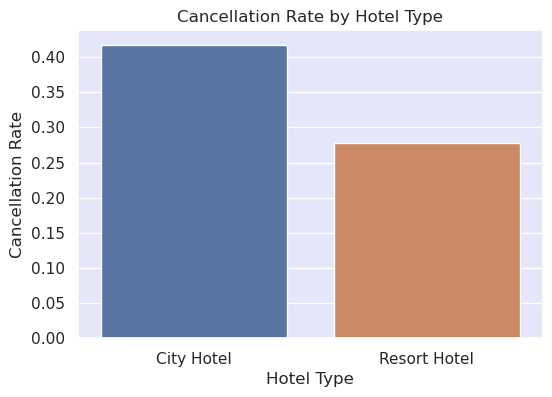

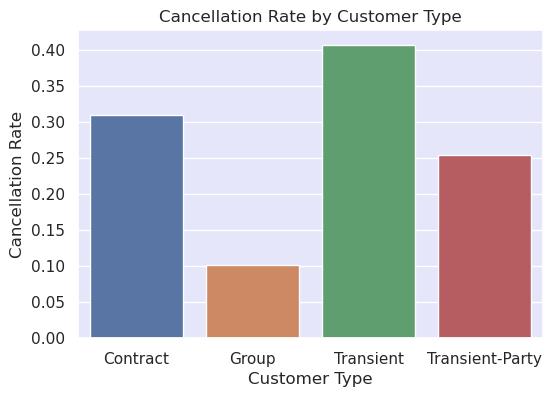

In [18]:
# ----------------------------------------
# 📊 1. Patterns in Cancellations
# ----------------------------------------

# Overall cancellation rate
cancel_rate = df['is_canceled'].mean() * 100
print(f"Overall Cancellation Rate: {cancel_rate:.2f}%")
# Cancellation rate by hotel
cancel_by_hotel = df.groupby('hotel')['is_canceled'].mean().reset_index()

# Cancellation by deposit type
cancel_by_deposit = df.groupby('deposit_type')['is_canceled'].mean().reset_index()

# Cancellation by customer type
cancel_by_customer = df.groupby('customer_type')['is_canceled'].mean().reset_index()

# Plot: Cancellation rate by hotel
plt.figure(figsize=(6,4))
sns.barplot(x='hotel', y='is_canceled', data=cancel_by_hotel)
plt.title("Cancellation Rate by Hotel Type")
plt.ylabel("Cancellation Rate")
plt.xlabel("Hotel Type")
plt.show()

# Plot: Cancellation rate by customer type
plt.figure(figsize=(6,4))
sns.barplot(x='customer_type', y='is_canceled', data=cancel_by_customer)
plt.title("Cancellation Rate by Customer Type")
plt.ylabel("Cancellation Rate")
plt.xlabel("Customer Type")
plt.show()

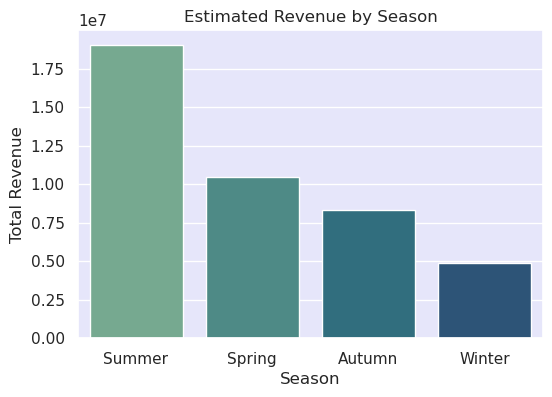

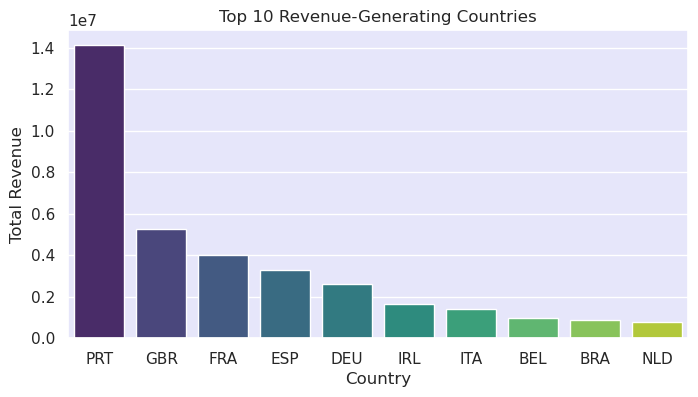


📊 Summary Insights:


,Overall Cancellation Rate (%),Highest Revenue Season,Highest Revenue Country,Top Customer Type by Revenue
0,37.041628,Summer,PRT,Transient


In [19]:
# ----------------------------------------
# 💰 3. Revenue Insights
# ----------------------------------------

# Average ADR and total revenue by hotel
rev_by_hotel = df.groupby('hotel')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)

# Revenue by customer type
rev_by_customer = df.groupby('customer_type')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)

# Revenue by season
rev_by_season = df.groupby('season')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)

# Plot: Revenue by Season
plt.figure(figsize=(6,4))
sns.barplot(x='season', y='revenue', data=rev_by_season, palette='crest')
plt.title("Estimated Revenue by Season")
plt.ylabel("Total Revenue")
plt.xlabel("Season")
plt.show()

# Top 10 revenue-generating countries
rev_by_country = (
    df.groupby('country')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(8,4))
sns.barplot(x='country', y='revenue', data=rev_by_country, palette='viridis')
plt.title("Top 10 Revenue-Generating Countries")
plt.ylabel("Total Revenue")
plt.xlabel("Country")
plt.show()

# ----------------------------------------
# 📈 Summary Statistics
# ----------------------------------------

summary = {
    'Overall Cancellation Rate (%)': [cancel_rate],
    'Highest Revenue Season': [rev_by_season.iloc[0]['season']],
    'Highest Revenue Country': [rev_by_country.iloc[0]['country']],
    'Top Customer Type by Revenue': [rev_by_customer.iloc[0]['customer_type']],
}

summary_df = pd.DataFrame(summary)
print("\n📊 Summary Insights:")
display(summary_df)


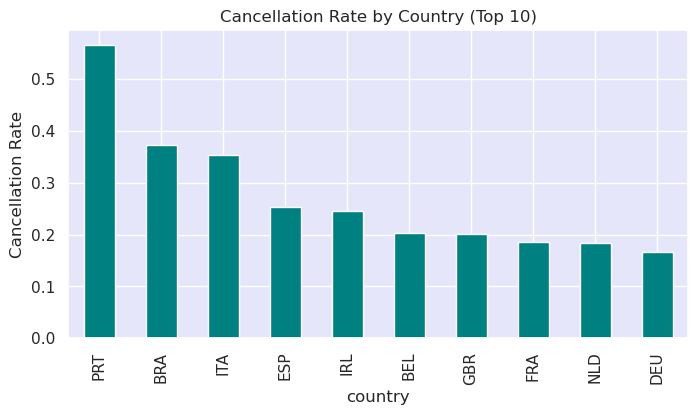

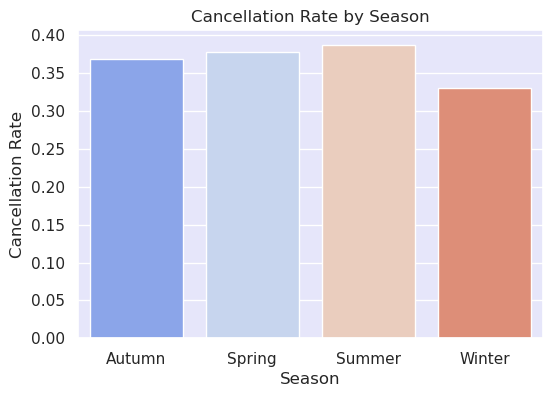

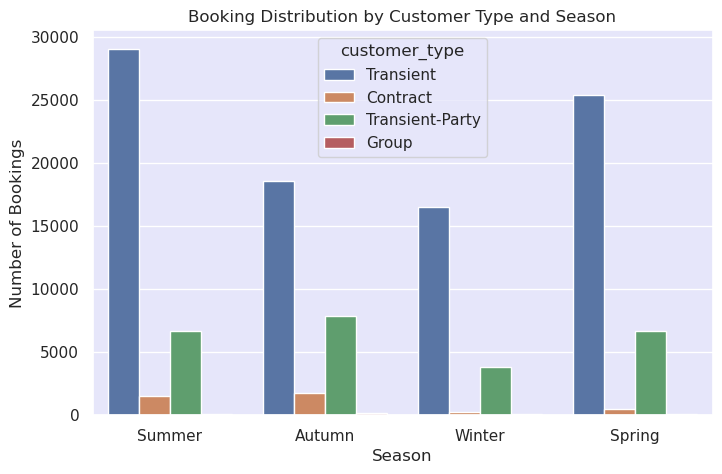

In [20]:
# ----------------------------------------
# 🌍 2. Impact of Country, Customer Type, and Season
# ----------------------------------------

# Top 10 countries by booking count
top_countries = df['country'].value_counts().head(10).index
country_cancel = (
    df[df['country'].isin(top_countries)]
    .groupby('country')['is_canceled']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,4))
country_cancel.plot(kind='bar', color='teal')
plt.title("Cancellation Rate by Country (Top 10)")
plt.ylabel("Cancellation Rate")
plt.show()
# Cancellation by Season
season_cancel = df.groupby('season')['is_canceled'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='season', y='is_canceled', data=season_cancel, palette='coolwarm')
plt.title("Cancellation Rate by Season")
plt.ylabel("Cancellation Rate")
plt.xlabel("Season")
plt.show()

# Booking distribution by customer type and season
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='season', hue='customer_type')
plt.title("Booking Distribution by Customer Type and Season")
plt.ylabel("Number of Bookings")
plt.xlabel("Season")
plt.show()

<h2 align="left"><font color='royalblue'>Best Regards!</font></h2>